# Latar Belakang 

Tokopakedi adalah ecommerce terbesar di Pakistan. Tokopakedi ini merupakan ecommerce untuk para *business owner* untuk beralih dari bisnis tradisional ke bisnis *online*. Perusahaan ini mencatatkan setiap penjualannya secara mendetail dari setiap customer yang berbelanja melalui ecommerce mereka. Sehingga didapatkan data pembelian customer dalam kurung waktu 2 tahun dari rilisnya aplikasi ecommerce untuk warga Pakistan. 

# Rumusan Masalah

Perusahaan ingin mengetahui perilaku customer dan hal apa yang membutuhkan *improvement*. Informasi ini akan memberikan *fresh ideas* untuk meningkatkan *engagement* pengguna dengan aplikasi dan proses *checkout* barang.

Sebagai seorang *business intelligence*, saya akan mencari tahu tentang :
1. Bagaimana engagement pengguna dengan aplikasi Tokopakedi?
2. Mengetahui strategi apa yang dapat digunakan untuk *boost revenue*?

Sebelum kita memahami data yang ada, melakukan proses data cleaning dan analisa lebih lanjut, kita perlu melakukan import terhadap libraries yang akan digunakan.

In [463]:
# Import libraries yang dibutuhkan untuk proses data cleaning sampai ke analisa data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data Understanding

Data yang akan digunakan untuk analisa ini adalah data dari ecommerce terbesar di Pakistan. 

In [464]:
# Load dataset yang akan digunakan
df = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv', dtype={'Customer ID': str, 'item_id': str})
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1,NaN,NaN,NaN,NaN,NaN
1,211133,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2,NaN,NaN,NaN,NaN,NaN
2,211134,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3,NaN,NaN,NaN,NaN,NaN
3,211135,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4,NaN,NaN,NaN,NaN,NaN
4,211136,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sebelum kita melihat lebih jauh dengan melakukan analisis data, kita perlu memperhatikan data lebih jauh agar kita semakin mengerti data apa yang akan digunakan untuk analisis dan kita juga dapat melakukan drop untuk data-data yang mungkin tidak kita pahami betul dan akan tidak digunakan dalam proses analisa data.

Pertama, kita dapat melihat informasi umum yang kita punya mengenai dataset ini :   

In [465]:
print(f'Jumlah baris pada dataset ini berjumlah {df.shape[0]}')
print(f'Jumlah kolom pada dataset ini berjumlah {df.shape[1]}')

Jumlah baris pada dataset ini berjumlah 1048575
Jumlah kolom pada dataset ini berjumlah 26


In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  object 
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [467]:
pd.set_option('display.max_colwidth', -1)
# Menampilkan data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabelinfo = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabelinfo

,Column Name,Number of Unique,Unique Sample
0,item_id,584524,"[211131, 211133, 211134, 211135, 211136, 211137, 211138, 211139, 211140, 211141, 211142, 211143, 211144, 211145, 211146, 211147, 211149, 211150, 211151, 211152, 211153, 211154, 211155, 211156, 211157, 211158, 211160, 211162, 211163, 211164, 211166, 211168, 211169, 211170, 211171, 211172, 211173, 211174, 211175, 211176, 211177, 211179, 211180, 211182, 211184, 211185, 211186, 211187, 211188, 211189, 211190, 211191, 211192, 211193, 211194, 211196, 211197, 211198, 211199, 211200, 211202, 211201, 211203, 211204, 211205, 211206, 211207, 211208, 211209, 211211, 211212, 211213, 211214, 211215, 211217, 211218, 211219, 211220, 211221, 211222, 211223, 211225, 211224, 211226, 211227, 211228, 211229, 211230, 211231, 211232, 211233, 211234, 211235, 211236, 211237, 211238, 211239, 211240, 211241, 211242, ...]"
1,status,16,"[complete, canceled, order_refunded, received, refund, closed, fraud, holded, exchange, pending_paypal, paid, \N, cod, pending, nan, processing, payment_review]"
2,created_at,789,"[7/1/2016, 7/2/2016, 7/3/2016, 7/4/2016, 7/5/2016, 7/6/2016, 7/7/2016, 7/8/2016, 7/9/2016, 7/10/2016, 7/11/2016, 7/12/2016, 7/13/2016, 7/14/2016, 7/15/2016, 7/16/2016, 7/17/2016, 7/18/2016, 7/19/2016, 7/20/2016, 7/21/2016, 7/22/2016, 7/23/2016, 7/24/2016, 7/25/2016, 7/26/2016, 7/27/2016, 7/28/2016, 7/29/2016, 7/30/2016, 7/31/2016, 8/1/2016, 8/2/2016, 8/3/2016, 8/4/2016, 8/5/2016, 8/6/2016, 8/7/2016, 8/8/2016, 8/9/2016, 8/10/2016, 8/11/2016, 8/12/2016, 8/13/2016, 8/14/2016, 8/15/2016, 8/16/2016, 8/17/2016, 8/18/2016, 8/19/2016, 8/20/2016, 8/21/2016, 8/22/2016, 8/23/2016, 8/24/2016, 8/25/2016, 8/26/2016, 8/27/2016, 8/28/2016, 8/29/2016, 8/30/2016, 8/31/2016, 9/1/2016, 9/2/2016, 9/3/2016, 9/4/2016, 9/5/2016, 9/6/2016, 9/7/2016, 9/8/2016, 9/9/2016, 9/10/2016, 9/11/2016, 9/12/2016, 9/13/2016, 9/14/2016, 9/15/2016, 9/16/2016, 9/17/2016, 9/18/2016, 9/19/2016, 9/20/2016, 9/21/2016, 9/22/2016, 9/23/2016, 9/24/2016, 9/25/2016, 9/26/2016, 9/27/2016, 9/28/2016, 9/29/2016, 9/30/2016, 10/1/2016, 10/2/2016, 10/3/2016, 10/4/2016, 10/5/2016, 10/6/2016, 10/7/2016, 10/8/2016, ...]"
3,sku,84889,"[kreations_YI 06-L, kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free, Ego_UP0017-999-MR0, kcc_krone deal, BK7010400AG, UK_Namkino All In One 200 Gms, UK_Namkino Mix Nimco 400 Gms, Apple iPhone 6S 64GB, GFC_Pedestal Myga Cross Base (Special Guard) 24"", BK1070200PL, BK1130200CF, kcc_Sultanat, kcc_glamour deal, Assetmen_MD-346-M, cr_DATES WITH CASHEW-400 GM, UK_Gift Box Mix Dry Fruit Sweets 500 Gms, itter_AB 1199, RL_B005, bed&rest_S7, L&L_LLHLE8224S, J&J_JJR-4, J&J_JJR-20, D Lend a Helping Hand, Mochika_M0001112-12, Mochika_M0001112-8, SKMT_Blood Test, SKMT_Medicine, sputnik_701/5-11, Ctees-Black Zip- Up Hoodie-XL, Samsung Galaxy J5, Veet_4, RS_Gulab jaman Tin, cr_PEANUT SALTY-200 GM, Oriflame_21557, JBS_TAT-128, Ajmery_BRR-590-M, HOS_GUCFW75, Lexon_LL116B-Blue, kcc_Fantasy Perfumed Talcum Powder-200gm, 2Zee_SC6, Q MOBILE Noir X20, rehaab_RJ160047, Farah_3-B, RS_Sohan Halwa Tin, UK_Soan Papdi Original 250 Gms, UK_Gift Box Soghaat 500 Gms, RS_Double Delight, Al Muhafiz Sohan Halwa Almond, UK_Gift Box Baklawa 500 Gms, sputnik_2146/6-8, kkc_Kingtox 450ml Classic Green All Insect Killer Spray, Al Muhafiz Sohan Halwa Walnut, RS_Honey Dry Fruit Halwa, itter_AB 1214, Eco Star_40U557, Orient_OR-6057 GX LGFD LV, HOS_JPGCW100, kkc_Jasmine King Air Freshener, asimjofaeanew_5A, ajmery_F9-981, hijabh_JILBAB-C (1)-52x, noritake_NTM163M, RS_Habshi Halwa Tin, sentiments_WRK1612, bata_comfit-8613714-43-9, UK_Namkino Mix Nimco 8 Pcs Gift Pack, Inoxy_Inoxy Hair Miracle Elixir, RS_Chum Chum Tin, Dany_AUK-650 , urban_ PT004-L, jackpot_JP-7999, UK_Gift Box Pistachio Delight 500 Gms, test_tcsconnect, sst_Lyquin-Regular fit-Large, Fcafe_11777-L, LC_359547105042, LC_3349668508587, RS_pheni Desi Ghee 1 kg , UK_Gulab Jamun Tin Pack 500 Gms, UK_Chum Chum Tin Pack 500 Gms, UK_Namkino Mix Nimco 200 Gms, sentiments_Ferrero Rocher Gift

In [468]:
# Melihat jumlah baris yang value pada setiap kolomnya adalah NaN (missing value)
df[df.isnull().sum(axis=1)==26]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
584524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [469]:
# Melihat persentase missing value dari setiap kolom
df.isnull().sum()/df.shape[0]*100

item_id                  44.255394 
status                   44.256825 
created_at               44.255394 
sku                      44.257302 
price                    44.255394 
qty_ordered              44.255394 
grand_total              44.255394 
increment_id             44.255394 
category_name_1          44.271034 
sales_commission_code    57.337434 
discount_amount          44.255394 
payment_method           44.255394 
Working Date             44.255394 
BI Status                44.255394 
 MV                      44.255394 
Year                     44.255394 
Month                    44.255394 
Customer Since           44.256443 
M-Y                      44.255394 
FY                       44.255394 
Customer ID              44.256443 
Unnamed: 21              100.000000
Unnamed: 22              100.000000
Unnamed: 23              100.000000
Unnamed: 24              100.000000
Unnamed: 25              100.000000
dtype: float64

Secara umum ada beberapa hal yang bisa dipahami mengenai dataset ini :
- Dataset ini terdiri dari **1048575 baris dan 26 kolom**
- Kolom item_id dan Customer ID memiliki data type **float64**, dimana seharusnya adalah **'str'**
- Kolom created_at, Working Date, dan Customer Since memiliki data type **object**, dimana seharusnya adalah **datetime64**
- Dari jumlah 1048575 baris, ada **464051** baris yang semua valuenya NaN
- Setiap kolom memiliki missing values dengan range sebesar 44.25% - 100%
- Di kolom status, category_name_1, dan sales_commission_code ada missing value dengan bentuk '\N'. Dapat diasumsikan bahwa '\N' ini adalah missing value, dan akan diubah menjadi NaN.
- Kolom Year, Month, dan M-Y terlihat memiliki data yang sama. Mari kita lihat lebih lanjut.
- Kolom increment_id berisi order display information dari setiap order, sehingga kurang relevan dalam analisis data.

# Data Cleaning

Dengan deskripsi umum seperti di atas, maka perlu dilakukan cleaning data, dan mengisi setiap missing value dengan value yang tepat.

Hal pertama yang dapat dilakukan adalah menyeragamkan setiap nama kolom dengan pemisah '_' dan menggunakan huruf kecil semua.

In [470]:
df.columns=df.columns.str.replace(' ','_').str.lower()
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'working_date', 'bi_status', '_mv_', 'year', 'month', 'customer_since',
       'm-y', 'fy', 'customer_id', 'unnamed:_21', 'unnamed:_22', 'unnamed:_23',
       'unnamed:_24', 'unnamed:_25'],
      dtype='object')

Berikutnya, kita akan mengganti value \N pada dataset menjadi NaN. Dapat diasumsikan bahwa \\N merupakan missing value pada dataset.

In [471]:
df = df.replace(r'^\\N$', np.nan, regex=True)
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,month,customer_since,m-y,fy,customer_id,unnamed:_21,unnamed:_22,unnamed:_23,unnamed:_24,unnamed:_25
0,211131,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,NaN,...,7.0,2016-7,7-2016,FY17,1,NaN,NaN,NaN,NaN,NaN
1,211133,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,NaN,...,7.0,2016-7,7-2016,FY17,2,NaN,NaN,NaN,NaN,NaN
2,211134,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,NaN,...,7.0,2016-7,7-2016,FY17,3,NaN,NaN,NaN,NaN,NaN
3,211135,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4,NaN,NaN,NaN,NaN,NaN
4,211136,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,NaN,...,7.0,2016-7,7-2016,FY17,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  object 
 1   status                 584505 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        576510 non-null  object 
 9   sales_commission_code  108348 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  working_date           584524 non-null  object 
 13  bi_status              584524 non-null  object 
 14  _mv_                   584524 non-

Kita perlu mengubah data types dari `created_at` dan `customer_since` menjadi 'datetime64'. Sehingga menjadi data yang dapat dianalisa.

In [473]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['customer_since'] = pd.to_datetime(df['customer_since'])

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  object        
 1   status                 584505 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  float64       
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category_name_1        576510 non-null  object        
 9   sales_commission_code  108348 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  working_date           584524 non-null  ob

## Missing Values

In [475]:
# Mengecek jumlah missing values pada setiap kolom
df.isna().sum()/df.shape[0]*100

item_id                  44.255394 
status                   44.257206 
created_at               44.255394 
sku                      44.257302 
price                    44.255394 
qty_ordered              44.255394 
grand_total              44.255394 
increment_id             44.255394 
category_name_1          45.019670 
sales_commission_code    89.667120 
discount_amount          44.255394 
payment_method           44.255394 
working_date             44.255394 
bi_status                44.255394 
_mv_                     44.255394 
year                     44.255394 
month                    44.255394 
customer_since           44.256443 
m-y                      44.255394 
fy                       44.255394 
customer_id              44.256443 
unnamed:_21              100.000000
unnamed:_22              100.000000
unnamed:_23              100.000000
unnamed:_24              100.000000
unnamed:_25              100.000000
dtype: float64

Missing values yang terdapat pada dataset ini cukup banyak. Di kolom unnamed:_21, unnamed:_22, unnamed:_23, unnamed:_24, dan unnamed:_25 semua datanya adalah NaN. Kita dapat melakukan drop untuk kolom-kolom tersebut. 

In [476]:
df.drop(columns=['unnamed:_21', 'unnamed:_22', 'unnamed:_23', 'unnamed:_24', 'unnamed:_25'], inplace=True)

Setelah melakukan drop, kita coba lihat lagi di info datasetnya. 

In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  object        
 1   status                 584505 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  float64       
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category_name_1        576510 non-null  object        
 9   sales_commission_code  108348 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  working_date           584524 non-null  ob

Kemudian kita akan mencari row yang semua kolomnya berisi data NaN, dan saya akan melakukan drop terhadap kolom tersebut. Hal ini dilakukan karena row yang berisi data NaN tidak dapat kita analisa lebih lanjut.

In [478]:
df.drop(df[df.isnull().sum(axis=1)==21].index,axis=0,inplace=True)

Kita coba melihat apakah masih ada missing value pada kolom-kolom tertentu.

In [479]:
df.isna().sum()/df.shape[0]*100

item_id                  0.000000 
status                   0.003251 
created_at               0.000000 
sku                      0.003422 
price                    0.000000 
qty_ordered              0.000000 
grand_total              0.000000 
increment_id             0.000000 
category_name_1          1.371030 
sales_commission_code    81.463892
discount_amount          0.000000 
payment_method           0.000000 
working_date             0.000000 
bi_status                0.000000 
_mv_                     0.000000 
year                     0.000000 
month                    0.000000 
customer_since           0.001882 
m-y                      0.000000 
fy                       0.000000 
customer_id              0.001882 
dtype: float64

In [480]:
df.isnull().sum()

item_id                  0     
status                   19    
created_at               0     
sku                      20    
price                    0     
qty_ordered              0     
grand_total              0     
increment_id             0     
category_name_1          8014  
sales_commission_code    476176
discount_amount          0     
payment_method           0     
working_date             0     
bi_status                0     
_mv_                     0     
year                     0     
month                    0     
customer_since           11    
m-y                      0     
fy                       0     
customer_id              11    
dtype: int64

Kita dapat melihat bahwa ternyata masih ada kolom yang mempunyai missing values. Dari total data 584524 baris, kolom sales_commission_code masih memiliki 476176 data NaN. Hal seperti ini dapat di-handle dengan cara drop setiap NaN value. Tapi hal ini tidak disarankan karena dapat jumlah missing value yang mencapai 81%. Sehingga, saya akan mengisi setiap missing value pada kolom ini dengan 'No Commission Code'.

In [481]:
df.fillna({'sales_commission_code':'No Commission code'},inplace=True)

In [482]:
df.isnull().sum()

item_id                  0   
status                   19  
created_at               0   
sku                      20  
price                    0   
qty_ordered              0   
grand_total              0   
increment_id             0   
category_name_1          8014
sales_commission_code    0   
discount_amount          0   
payment_method           0   
working_date             0   
bi_status                0   
_mv_                     0   
year                     0   
month                    0   
customer_since           11  
m-y                      0   
fy                       0   
customer_id              11  
dtype: int64

Dapat dilihat bahwa di kolom `category_name_1` terdapat 8014 data NaN. Solusi yang saya dapat tawarkan adalah dengan mengganti setiap value NaN dengan 'Uncategorized'

In [483]:
df.fillna({'category_name_1':'Uncategorized'},inplace=True)

Pada kolom `customer_since` dan `customer_id` ada 11 data NaN. Data ini dapat dihandle dengan cara melakukan drop untuk setiap row di kolom `customer_since` dan `customer_id` yang kosong.

In [484]:
df.dropna(subset=['customer_since', 'customer_id'], inplace=True)

In [485]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['customer_since'] = pd.to_datetime(df['customer_since'])

In [486]:
df.isnull().sum()

item_id                  0 
status                   19
created_at               0 
sku                      20
price                    0 
qty_ordered              0 
grand_total              0 
increment_id             0 
category_name_1          0 
sales_commission_code    0 
discount_amount          0 
payment_method           0 
working_date             0 
bi_status                0 
_mv_                     0 
year                     0 
month                    0 
customer_since           0 
m-y                      0 
fy                       0 
customer_id              0 
dtype: int64

Masih terdapat 2 kolom yang masih memiliki missing value yaitu kolom `status` dan `sku`. Kolom `sku` akan di handle dengan mengganti missing value dengan 'No Description'

In [487]:
# Mengisi missing value pada kolom sku dengan 'No Description'
df.fillna({'sku':'No Description'},inplace=True)

Jika kita melihat value counts dari setiap data di kolom status. Maka dapat dilihat bahwa banyak distinct value pada kolom tersebut yang memiliki makna yang sama. 

Kita akan membuat 4 pengelompokan.
1. complete = complete + received + cod + paid + closed
2. canceled = canceled + order_refunded + refund
3. pending = payment_review + pending + processing + holded + pending_paypal + exchange
4. fraud = fraud

Tujuannya dibuat menjadi 4 pengelompokan supaya status bisa dinyatakan dengan lebih sederhana.

In [488]:
# Penghitungan awal setiap value dari kolom status
df['status'].value_counts()

complete          233685
canceled          201244
received          77289 
order_refunded    59524 
refund            8050  
cod               2859  
paid              1159  
closed            494   
payment_review    57    
pending           48    
processing        33    
holded            31    
fraud             10    
pending_paypal    7     
exchange          4     
Name: status, dtype: int64

In [489]:
# Pengelompokkan 'complete'
df = df.replace('received', 'complete').replace('cod', 'complete').replace('paid', 'complete').replace('closed', 'complete')

In [490]:
# Pengelompokan 'canceled'
df = df.replace('order_refunded', 'canceled').replace('refund', 'canceled')

In [491]:
# Pengelompokkan 'pending'
df = df.replace('payment_review', 'pending').replace('processing', 'pending').replace('holded', 'pending').replace('pending_paypal', 'pending').replace('exchange', 'pending')

In [492]:
# Hasil akhir pengelompokkan
df['status'].value_counts()

complete    315486
canceled    268818
pending     180   
fraud       10    
Name: status, dtype: int64

Missing values pada kolom `status` akan kita isi dengan menggunakan modus sebagai acuan untuk pengisian ini. Dikarenakan value terbanyak adalah value complete, maka untuk setiap missing value pada kolom `status` akan diisi dengan 'complete' sebagai nilai modusnya.

In [493]:
df.fillna({'status': 'complete'},inplace=True)

In [494]:
df.isnull().sum()

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category_name_1          0
sales_commission_code    0
discount_amount          0
payment_method           0
working_date             0
bi_status                0
_mv_                     0
year                     0
month                    0
customer_since           0
m-y                      0
fy                       0
customer_id              0
dtype: int64

Jadi sekarang dapat dilihat bahwa missing value sudah terisi dan data sudah siap digunakan untuk analisa.

Untuk menjawab rumusan masalah yang sudah dijabarkan sebelumnya, maka akan dilakukan:
1. *cohort analysis* : cohort analysis ini akan digunakan untuk melihat customer retention dalam rentang waktu tertentu.
2. *data analysis* :  *data analysis* akan dilakukan untuk melihat faktor-faktor lain yang berhubungan dengan sales.

# Cohort Analysis

Pertama kita mau melihat tanggal terawal dan terakhir dari dataset ini

In [495]:
print(df['created_at'].min())
print(df['created_at'].max())

print(df['customer_since'].min())
print(df['customer_since'].max())

2016-07-01 00:00:00
2018-08-28 00:00:00
2016-07-01 00:00:00
2018-08-01 00:00:00


Kita akan menambahkan kolom baru yaitu `cohort_month` yang berisikan tahun dan bulan pertama setiap `customer_id` menggunakan aplikasi ecommerce iini.

In [498]:
df['cohort_month'] = df.groupby('customer_id')['created_at'].transform('min').dt.to_period('M')

Kita akan menambah kolom baru yaitu `current_order_month` yaitu menunjukkan tahun dan bulan pengguna menggunakan aplikasi ecommerce. 

In [500]:
df['current_order_month'] = df['created_at'].dt.to_period('M')
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,bi_status,_mv_,year,month,customer_since,m-y,fy,customer_id,cohort_month,current_order_month
0,211131,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,No Commission code,...,#REF!,"1,950",2016.0,7.0,2016-07-01,7-2016,FY17,1,2016-07,2016-07
1,211133,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,No Commission code,...,Gross,240,2016.0,7.0,2016-07-01,7-2016,FY17,2,2016-07,2016-07
2,211134,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,No Commission code,...,Gross,"2,450",2016.0,7.0,2016-07-01,7-2016,FY17,3,2016-07,2016-07
3,211135,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,Net,360,2016.0,7.0,2016-07-01,7-2016,FY17,4,2016-07,2016-07
4,211136,canceled,2016-07-01,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,No Commission code,...,Valid,"1,110",2016.0,7.0,2016-07-01,7-2016,FY17,5,2016-07,2016-07


Lalu, kita akan membuat dataframe baru yang berisi df yang di-groupby berdasarkan `cohort_month` dan `current_order_month` dan dihitung nilai setiap `customer_id` dari proses groupby dan diberi nama kolom `n_customers`

In [509]:
df_cohort = df.groupby(['cohort_month', 'current_order_month'])['customer_id'].nunique().reset_index().rename(
                columns={'customer_id': 'n_customers'})

In [510]:
# Gambaran isi dari df_cohort
df_cohort.head()

,cohort_month,current_order_month,n_customers
0,2016-07,2016-07,2406
1,2016-07,2016-08,468
2,2016-07,2016-09,391
3,2016-07,2016-10,325
4,2016-07,2016-11,472


In [511]:
# Melihar informasi umum dari df_cohort
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   cohort_month         351 non-null    period[M]
 1   current_order_month  351 non-null    period[M]
 2   n_customers          351 non-null    int64    
dtypes: int64(1), period[M](2)
memory usage: 8.4 KB


Kemudian, kita melakukan penghitungan jarak waktu dari `current_order_month` dengan `cohort_month`. Hasil yang didapatkan adalah jarak dalam satuan hitung hari.

In [512]:
period_distance = (df_cohort['current_order_month'].dt.to_timestamp() - df_cohort['cohort_month'].dt.to_timestamp()).dt.days
period_distance

0      0  
1      31 
2      62 
3      92 
4      123
      ... 
346    30 
347    61 
348    0  
349    31 
350    0  
Length: 351, dtype: int64

Kita akan menambahkan `period_distance` ke df_cohort, dan dibagi dengan 31, sehingga menghasilkan `period_distance` dalam hitungan bulan.

In [513]:
import math

df_cohort['period_distance'] = period_distance.apply(lambda x: math.ceil(x/31))
df_cohort.head()

,cohort_month,current_order_month,n_customers,period_distance
0,2016-07,2016-07,2406,0
1,2016-07,2016-08,468,1
2,2016-07,2016-09,391,2
3,2016-07,2016-10,325,3
4,2016-07,2016-11,472,4


Selanjutnya kita akan membuat tabel perkembangan jumlah customer dari sejak menggunakan aplikasi, hingga kurun waktu 25 bulan berikutnya. 

In [516]:
df_cohort_pivot = df_cohort.pivot_table(
                                            index='cohort_month',
                                            columns='period_distance',
                                            values='n_customers'
)
pd.set_option('display.max_columns', 500)
df_cohort_pivot

period_distance,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
cohort_month,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07,2406.0,468.0,391.0,325.0,472.0,277.0,250.0,212.0,244.0,251.0,244.0,179.0,171.0,156.0,73.0,109.0,213.0,93.0,71.0,57.0,88.0,60.0,90.0,69.0,51.0,55.0
2016-08,3097.0,396.0,274.0,422.0,218.0,188.0,153.0,169.0,158.0,175.0,129.0,126.0,124.0,52.0,76.0,181.0,69.0,61.0,54.0,74.0,54.0,66.0,46.0,35.0,43.0,NaN
2016-09,4773.0,660.0,1138.0,343.0,290.0,228.0,377.0,347.0,492.0,245.0,261.0,271.0,99.0,176.0,470.0,132.0,118.0,116.0,163.0,94.0,175.0,84.0,72.0,100.0,NaN,NaN
2016-10,2593.0,520.0,195.0,170.0,132.0,172.0,151.0,177.0,83.0,89.0,91.0,42.0,61.0,176.0,58.0,40.0,38.0,52.0,42.0,56.0,34.0,23.0,28.0,NaN,NaN,NaN
2016-11,14697.0,1232.0,635.0,537.0,645.0,622.0,924.0,497.0,540.0,532.0,172.0,328.0,1179.0,293.0,198.0,227.0,320.0,181.0,308.0,157.0,117.0,147.0,NaN,NaN,NaN,NaN
2016-12,2548.0,254.0,150.0,149.0,101.0,113.0,57.0,67.0,63.0,32.0,42.0,131.0,29.0,41.0,38.0,44.0,23.0,33.0,27.0,14.0,22.0,NaN,NaN,NaN,NaN,NaN
2017-01,2410.0,244.0,136.0,132.0,125.0,85.0,71.0,70.0,45.0,50.0,121.0,45.0,40.0,30.0,36.0,28.0,46.0,24.0,17.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,2843.0,281.0,145.0,125.0,85.0,87.0,76.0,36.0,41.0,111.0,40.0,38.0,43.0,58.0,36.0,35.0,30.0,24.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,4526.0,394.0,277.0,148.0,155.0,155.0,55.0,85.0,220.0,65.0,47.0,58.0,83.0,42.0,78.0,48.0,40.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [517]:
# Melihat jumlah customer yang berbelanja di saat mereka baru join di ecommerce ini.
initial_month = df_cohort_pivot[0]
initial_month

cohort_month
2016-07    2406.0 
2016-08    3097.0 
2016-09    4773.0 
2016-10    2593.0 
2016-11    14697.0
2016-12    2548.0 
2017-01    2410.0 
2017-02    2843.0 
2017-03    4526.0 
2017-04    3167.0 
2017-05    6487.0 
2017-06    3242.0 
2017-07    3395.0 
2017-08    4181.0 
2017-09    1546.0 
2017-10    3375.0 
2017-11    16719.0
2017-12    2397.0 
2018-01    2002.0 
2018-02    5878.0 
2018-03    11329.0
2018-04    2486.0 
2018-05    3998.0 
2018-06    1933.0 
2018-07    1768.0 
2018-08    1530.0 
Freq: M, Name: 0, dtype: float64

Mengubah semua value pada df_cohort_pct dalam bentuk persentase.

In [518]:
df_cohort_pct = df_cohort_pivot.loc[:, 0:25].apply(lambda x: round((x/initial_month * 100), 1))
df_cohort_pct

period_distance,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
cohort_month,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07,100.0,19.5,16.3,13.5,19.6,11.5,10.4,8.8,10.1,10.4,10.1,7.4,7.1,6.5,3.0,4.5,8.9,3.9,3.0,2.4,3.7,2.5,3.7,2.9,2.1,2.3
2016-08,100.0,12.8,8.8,13.6,7.0,6.1,4.9,5.5,5.1,5.7,4.2,4.1,4.0,1.7,2.5,5.8,2.2,2.0,1.7,2.4,1.7,2.1,1.5,1.1,1.4,NaN
2016-09,100.0,13.8,23.8,7.2,6.1,4.8,7.9,7.3,10.3,5.1,5.5,5.7,2.1,3.7,9.8,2.8,2.5,2.4,3.4,2.0,3.7,1.8,1.5,2.1,NaN,NaN
2016-10,100.0,20.1,7.5,6.6,5.1,6.6,5.8,6.8,3.2,3.4,3.5,1.6,2.4,6.8,2.2,1.5,1.5,2.0,1.6,2.2,1.3,0.9,1.1,NaN,NaN,NaN
2016-11,100.0,8.4,4.3,3.7,4.4,4.2,6.3,3.4,3.7,3.6,1.2,2.2,8.0,2.0,1.3,1.5,2.2,1.2,2.1,1.1,0.8,1.0,NaN,NaN,NaN,NaN
2016-12,100.0,10.0,5.9,5.8,4.0,4.4,2.2,2.6,2.5,1.3,1.6,5.1,1.1,1.6,1.5,1.7,0.9,1.3,1.1,0.5,0.9,NaN,NaN,NaN,NaN,NaN
2017-01,100.0,10.1,5.6,5.5,5.2,3.5,2.9,2.9,1.9,2.1,5.0,1.9,1.7,1.2,1.5,1.2,1.9,1.0,0.7,0.9,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,100.0,9.9,5.1,4.4,3.0,3.1,2.7,1.3,1.4,3.9,1.4,1.3,1.5,2.0,1.3,1.2,1.1,0.8,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,100.0,8.7,6.1,3.3,3.4,3.4,1.2,1.9,4.9,1.4,1.0,1.3,1.8,0.9,1.7,1.1,0.9,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [555]:
# Membuat kolom jumlah initial customer
df_cohort['n_customers_init'] = df_cohort.groupby('cohort_month')['n_customers'].transform('max')
df_cohort.head()

,cohort_month,current_order_month,n_customers,period_distance,n_customers_init
0,2016-07,2016-07,2406,0,2406
1,2016-07,2016-08,468,1,2406
2,2016-07,2016-09,391,2,2406
3,2016-07,2016-10,325,3,2406
4,2016-07,2016-11,472,4,2406


In [556]:
# Mengkonversi n_customer menjadi nilai persentase
df_cohort['n_customers_pct'] = round((df_cohort['n_customers'] / df_cohort['n_customers_init'] * 100), 1)
df_cohort.head()

,cohort_month,current_order_month,n_customers,period_distance,n_customers_init,n_customers_pct
0,2016-07,2016-07,2406,0,2406,100.0
1,2016-07,2016-08,468,1,2406,19.5
2,2016-07,2016-09,391,2,2406,16.3
3,2016-07,2016-10,325,3,2406,13.5
4,2016-07,2016-11,472,4,2406,19.6


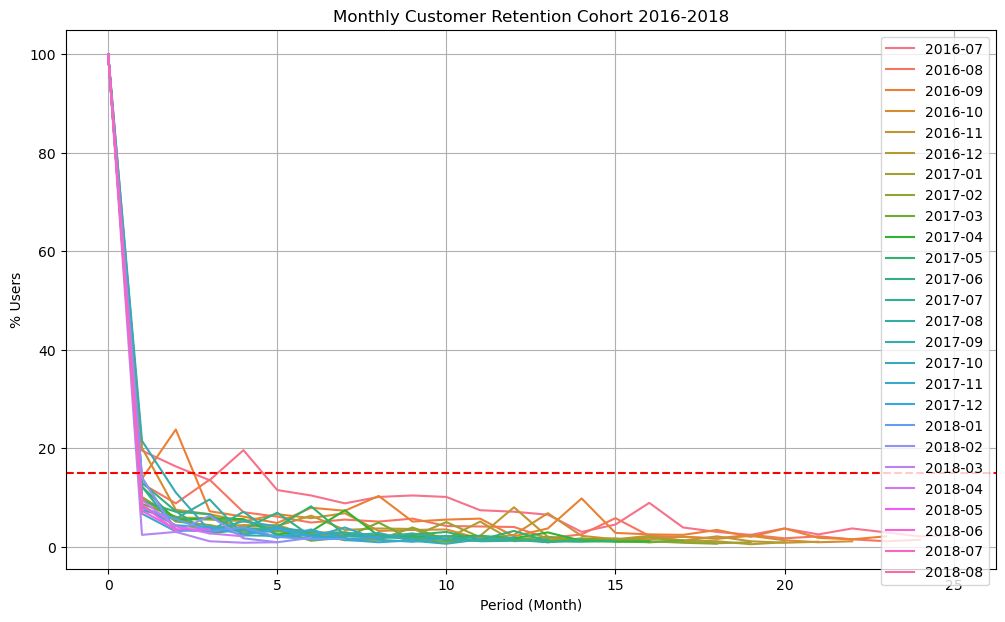

In [564]:
plt.figure(figsize=(12, 7))
sns.lineplot(x='period_distance', y='n_customers_pct', hue='cohort_month', data=df_cohort)
plt.legend()
plt.axhline(y=15, ls='--', color='red')
plt.xlabel('Period (Month)')
plt.ylabel('% Users')
plt.title('Monthly Customer Retention Cohort 2016-2018')
plt.grid();

In [519]:
# Mencari persentase pemakaian aplikasi setelah bulan pertama pemakaian.
df_cohort_pct[1].mean()

10.96

Kesimpulan yang didapatkan dengan tabel cohort analysis ini adalah :

1. Asumsi yang bisa diambil bahwa bln 7 tahun 2016 adalah tanggal pembukaan ecommerce ini
2. Hanya 7% dari total customer saat pembukaan yang masih menggunakan ecommerce ini di 12 bulan kemudian dan hanya 2% yang masih menggunakannya hingga bulan ke 25-nya
3. Rata-rata hanya 11% dari total customer di bulan pertama yang menggunakan aplikasi kembali di bulan berikutnya. 
4. Dalam waktu 3 bln setelah sign-up, jumlah pengguna ada di bawah level 15%

# Data Analysis

In [544]:
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,working_date,bi_status,_mv_,year,month,customer_since,m-y,fy,customer_id,cohort_month,current_order_month
0,211131,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,No Commission code,0.0,complete,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-07-01,7-2016,FY17,1,2016-07,2016-07
1,211133,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,No Commission code,0.0,complete,7/1/2016,Gross,240,2016.0,7.0,2016-07-01,7-2016,FY17,2,2016-07,2016-07
2,211134,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,No Commission code,0.0,complete,7/1/2016,Gross,"2,450",2016.0,7.0,2016-07-01,7-2016,FY17,3,2016-07,2016-07
3,211135,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,complete,7/1/2016,Net,360,2016.0,7.0,2016-07-01,7-2016,FY17,4,2016-07,2016-07
4,211136,canceled,2016-07-01,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,No Commission code,0.0,complete,7/1/2016,Valid,"1,110",2016.0,7.0,2016-07-01,7-2016,FY17,5,2016-07,2016-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204,complete,2018-08-28,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,No Commission code,0.0,complete,8/28/2018,Valid,699,2018.0,8.0,2018-08-01,8-2018,FY19,115320,2018-08,2018-08
584520,905205,pending,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,No Commission code,0.0,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-08-01,8-2018,FY19,115326,2018-08,2018-08
584521,905206,pending,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,No Commission code,0.0,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-07-01,8-2018,FY19,113474,2018-07,2018-08
584522,905207,pending,2018-08-28,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,No Commission code,0.0,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-07-01,8-2018,FY19,113474,2018-07,2018-08


Kami ingin melihat pengaruh category terhadap setiap `status` pembelian.

In [538]:
df[df['status'] == 'complete']['category_name_1'].value_counts()

Men's Fashion         53253
Mobiles & Tablets     50297
Women's Fashion       34483
Beauty & Grooming     27492
Superstore            27194
Appliances            25540
Soghaat               24149
Home & Living         16241
Health & Sports       11657
Entertainment         11495
Kids & Baby           10223
Others                9318 
Computing             7257 
Uncategorized         3382 
School & Education    2177 
Books                 1347 
Name: category_name_1, dtype: int64

In [539]:
df[df['status'] == 'pending']['category_name_1'].value_counts()

Mobiles & Tablets     37
Men's Fashion         35
Superstore            29
Appliances            16
Entertainment         14
Soghaat               13
Women's Fashion       9 
Health & Sports       6 
Beauty & Grooming     6 
Home & Living         5 
Computing             5 
Others                4 
School & Education    1 
Name: category_name_1, dtype: int64

In [540]:
df[df['status'] == 'canceled']['category_name_1'].value_counts()

Mobiles & Tablets     65370
Men's Fashion         38931
Appliances            26857
Women's Fashion       25228
Others                19890
Superstore            16390
Entertainment         14815
Beauty & Grooming     13996
Home & Living         10257
Soghaat               9849 
Computing             8670 
Kids & Baby           6271 
Health & Sports       5839 
Uncategorized         4632 
School & Education    1300 
Books                 523  
Name: category_name_1, dtype: int64

In [541]:
df[df['status'] == 'fraud']['category_name_1'].value_counts()

Mobiles & Tablets    6
Entertainment        2
Home & Living        1
Computing            1
Name: category_name_1, dtype: int64

In [543]:
df.shape

(584513, 23)

Kesimpulan :
1. Kategori barang yang paling sering dicari adalah 'Mobile & Tablets' dan 'Men's Fashion'
2. Terjadi sedikit sekali kasus penipuan melalui ecommerce ini hanya 10 kasus dari 584513 data.
3. Kategori barang dengan status complete yang paling banyak sukses adalah Men's Fashion dan Mobile & Tablets
4. Di sisi, lain 2 kategori ini juga merupakan kategori barang yang statusnya masih 'pending' atau malah 'canceled'
5. Dengan 2 kategori ini adalah jenis kategori barang yang 'complete' maka hal ini berhubungan dengan hasil cohort analysis. Jadi dengan pembelian Men's Fashion dan Mobile & Tablets maka pengguna aplikasi ini akan jarang sekali membuka dan melakukan transaksi ulang. Karena 2 barang ini sifatnya bisa dipakai dalam jangka waktu > 1 tahun.

Selanjutnya, kami akan melihat hubungan `payment_method` dengan `status`

In [545]:
df['payment_method'].unique()

array(['complete', 'ublcreditcard', 'mygateway', 'customercredit',
       'cashatdoorstep', 'mcblite', 'internetbanking', 'marketingexpense',
       'productcredit', 'financesettlement', 'Payaxis', 'jazzvoucher',
       'jazzwallet', 'Easypay', 'Easypay_MA', 'easypay_voucher',
       'bankalfalah', 'apg'], dtype=object)

In [547]:
df[df['status'] == 'complete']['payment_method'].value_counts()

complete             195831
Payaxis              31986 
Easypay              27507 
easypay_voucher      18233 
jazzwallet           17084 
jazzvoucher          6620  
customercredit       6013  
bankalfalah          5941  
Easypay_MA           4359  
cashatdoorstep       679   
mcblite              396   
apg                  352   
ublcreditcard        192   
internetbanking      160   
productcredit        85    
marketingexpense     44    
mygateway            14    
financesettlement    9     
Name: payment_method, dtype: int64

In [548]:
df[df['status'] == 'canceled']['payment_method'].value_counts()

complete             76087
Payaxis              65633
Easypay              55387
jazzwallet           18060
bankalfalah          17044
easypay_voucher      12910
Easypay_MA           9668 
jazzvoucher          9001 
customercredit       1539 
apg                  1406 
ublcreditcard        689  
mygateway            655  
mcblite              327  
internetbanking      312  
cashatdoorstep       53   
productcredit        40   
financesettlement    6    
marketingexpense     1    
Name: payment_method, dtype: int64

In [549]:
df[df['status'] == 'pending']['payment_method'].value_counts()

bankalfalah        80
complete           37
easypay_voucher    33
Payaxis            12
jazzvoucher        12
customercredit     3 
Easypay            2 
jazzwallet         1 
Name: payment_method, dtype: int64

In [550]:
df[df['status'] == 'fraud']['payment_method'].value_counts()

Payaxis          9
ublcreditcard    1
Name: payment_method, dtype: int64

Kesimpulan :
1. Salah satu faktor mengapa ecommerce ini adalah yang terbesar di Pakistan adalah banyaknya metode pembayaran yang dapat digunakan untuk melakukan transaksi disini.
2. Metode pembayaran yang digunakan untuk penipuan adalah Payaxis dan ublcreditcard. 
3. Metode pembayaran cashatdoorstep sudah bukan menjadi metode pembayaran yang digunakan sebagian besar orang. Metode pembayaran yang sering digunakan diasumsikan adalah metode yang bersifat mobile. Sehingga customer dapat membayar dimana saja dan kapan saja.

Terdapat anomali dalam dataset ini. Dapat dilihat di bawah ini bahwa terjadi ketidakcocokan di kolom `grand_total`.

In [551]:
gacocok = df[(df['price'] * df['qty_ordered']) - (df['discount_amount']) != df['grand_total']]
gacocok

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,working_date,bi_status,_mv_,year,month,customer_since,m-y,fy,customer_id,cohort_month,current_order_month
11,211143,complete,2016-07-01,BK1070200PL,210.0,1.0,366.0,100147454,Soghaat,No Commission code,0.0,complete,7/1/2016,Valid,210,2016.0,7.0,2016-07-01,7-2016,FY17,10,2016-07,2016-07
12,211144,complete,2016-07-01,BK1130200CF,156.0,1.0,366.0,100147454,Soghaat,No Commission code,0.0,complete,7/1/2016,Valid,156,2016.0,7.0,2016-07-01,7-2016,FY17,10,2016-07,2016-07
14,211146,complete,2016-07-01,kcc_glamour deal,320.0,1.0,0.0,100147456,Beauty & Grooming,No Commission code,0.0,customercredit,7/1/2016,Net,320,2016.0,7.0,2016-07-01,7-2016,FY17,12,2016-07,2016-07
16,211149,complete,2016-07-01,cr_DATES WITH CASHEW-400 GM,420.0,1.0,1270.0,100147458,Soghaat,R-KHW-104406,0.0,complete,7/1/2016,Net,420,2016.0,7.0,2016-07-01,7-2016,FY17,13,2016-07,2016-07
17,211150,complete,2016-07-01,UK_Gift Box Mix Dry Fruit Sweets 500 Gms,360.0,1.0,1270.0,100147458,Soghaat,R-KHW-104406,0.0,complete,7/1/2016,Net,360,2016.0,7.0,2016-07-01,7-2016,FY17,13,2016-07,2016-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204,complete,2018-08-28,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,No Commission code,0.0,complete,8/28/2018,Valid,699,2018.0,8.0,2018-08-01,8-2018,FY19,115320,2018-08,2018-08
584520,905205,pending,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,No Commission code,0.0,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-08-01,8-2018,FY19,115326,2018-08,2018-08
584521,905206,pending,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,No Commission code,0.0,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-07-01,8-2018,FY19,113474,2018-07,2018-08
584522,905207,pending,2018-08-28,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,No Commission code,0.0,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-07-01,8-2018,FY19,113474,2018-07,2018-08


In [553]:
round(((len(gacocok) / len(df)) * 100), 2)

54.42

Hal ini dapat terjadi karena adanya faktor lain yang mempengaruhi harga, namun tidak di-record dalam dataset.

# Kesimpulan dan Rekomendasi

Kesimpulan yang dapat diambil melalui analisa data ini adalah :
1. Ecommerce ini merupakan ecommerce terbesar di Pakistan karena memiliki banyak metode pembayaran, sehingga memudahkan      konsumen untuk membeli barang di ecommerce ini.
2. Selain itu, alasan lain dibalik kesuksesan ecommerce ini di Pakistan adalah karena jumlah kasus penipuan yang terekam di data sangatlah sedikit hanya sekitar 1 banding 50.000-an transaksi.
3. Dan juga, ecommerce ini menjadi tujuan orang-orang di Pakistan untuk membeli barang karena barang yang ada cukup lengkap dari segi kategori. 
4. Berdasarkan cohort analysis, dapat dilihat bahwa terjadi penurunan yang cukup drastis dari segi pengguna yang kembali membuka aplikasi ini. Namun, lonjakan pengguna dapat terlihat di sekitar bulan ke-11 di setiap tahunnya. Mungkin hal ini disebabkan karena persiapan hadiah akhir tahun.
5. Ada 54.42 % data anomali pada dataset ini. Hal ini disebabkan adanya faktor-faktor lain yang membuat grand total-nya kurang tepat.
6. Penjualan Moiles & Tablets lebih tinggi dibandingkan dengan penjualan buku

Rekomendasi yang dapat diberikan adalah :
1. Melakukan proses input data dengan lebih lengkap, karena sebelum data cleaning masih banyak data yang berisi missing value di setiap kolomnya.
2. Perlu adanya tambahan faktor lain yang dapat mempengaruhi harga grand total seperti pengaruh pembelian saat flash sale, dsb.
3. Perlu adanya promo sales atau bundling barang-barang tertentu dengan buku. Misal paket rak + buku, atau buku + alat tulis sekolah. Sehingga stok buku-buku juga bisa berkurang dan buku yang beredar di Pakistan.
4. Ada banyak hal yang mempengaruhi penurunan pengguna setiap bulannya. Mungkin bisa disebabkan karena UI/UX design tahun 2016-18 masih kurang baik. Sehingga untuk design bisa diperbaharui agar mudah digunakan untuk berbagai range usia pengguna.